<a href="https://colab.research.google.com/github/Chehan2004/DSGP_GROUP_36/blob/treatments_and_recommendations/Fertilizer%26Pesticide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', 25) #to display all columns

In [94]:
df = pd.read_csv("//content/drive/MyDrive/new_tea_fertilizer_dosage_dataset.csv")
df.head()


,soil_type,soil_pH,rainfall_mm_week,temperature_c,humidity_percent,disease,disease_severity,recommended_fertilizer,recommended_dosage_level
0,clay,6.5,121,28,88,Tea red scab,high,NPK,normal
1,clay,4.1,48,25,83,Tea leaf blight,medium,K,low
2,loam,5.5,90,34,58,Brown blight,high,P,delay
3,loam,6.5,167,27,55,Brown blight,medium,P,normal
4,sandy,6.1,100,34,56,Bird eye spot,low,NPK,delay


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   soil_type                 1000 non-null   object 
 1   soil_pH                   1000 non-null   float64
 2   rainfall_mm_week          1000 non-null   int64  
 3   temperature_c             1000 non-null   int64  
 4   humidity_percent          1000 non-null   int64  
 5   disease                   1000 non-null   object 
 6   disease_severity          1000 non-null   object 
 7   recommended_fertilizer    1000 non-null   object 
 8   recommended_dosage_level  1000 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


In [96]:
# to remove duplicates
duplicates = df.duplicated().sum()
duplicates

np.int64(0)

No duplicate rows found

Handling missing values

In [97]:
# Replacing common missing strings with real NaNs

df = df.replace(["N/A", "none", "None", "-", ""], np.nan)
df.isna().sum()

,0
soil_type,0
soil_pH,0
rainfall_mm_week,0
temperature_c,0
humidity_percent,0
disease,0
disease_severity,0
recommended_fertilizer,0
recommended_dosage_level,0


In [98]:
df.shape

(1000, 9)

In [99]:
label_enc = LabelEncoder()

for col in ["soil_type", "disease", "disease_severity", "recommended_fertilizer", "recommended_dosage_level"]:
    df[col + "_Encoded"] = label_enc.fit_transform(df[col])

In [100]:
df.head()

,soil_type,soil_pH,rainfall_mm_week,temperature_c,humidity_percent,disease,disease_severity,recommended_fertilizer,recommended_dosage_level,soil_type_Encoded,disease_Encoded,disease_severity_Encoded,recommended_fertilizer_Encoded,recommended_dosage_level_Encoded
0,clay,6.5,121,28,88,Tea red scab,high,NPK,normal,0,8,0,2,2
1,clay,4.1,48,25,83,Tea leaf blight,medium,K,low,0,6,2,0,1
2,loam,5.5,90,34,58,Brown blight,high,P,delay,1,3,0,3,0
3,loam,6.5,167,27,55,Brown blight,medium,P,normal,1,3,2,3,2
4,sandy,6.1,100,34,56,Bird eye spot,low,NPK,delay,2,2,1,2,0


In [101]:
X = df[
    [
        "soil_type",
        "soil_pH",
        "rainfall_mm_week",
        "temperature_c",
        "humidity_percent",
        "disease",
        "disease_severity"
    ]
]

y = df[["recommended_fertilizer_Encoded", "recommended_dosage_level_Encoded"]]

Adding noise

In [102]:
# X = X + np.random.normal(0, 0.02, X.shape)
# # Flip 3% of labels
# n = int(0.03 * len(y))
# flip_idx = np.random.choice(len(y), n, replace=False)
# y[flip_idx] = np.random.choice(np.unique(y), n)


In [103]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [104]:
print("TRAIN DATA:")
display(X_train.head())

print("\nTEST DATA:")
display(X_test.head())


TRAIN DATA:


,soil_type,soil_pH,rainfall_mm_week,temperature_c,humidity_percent,disease,disease_severity
29,loam,4.5,124,24,60,Anthracnose,low
535,sandy,6.1,93,22,90,Tea leaf blight,low
695,clay,6.1,180,27,84,Tea red leaf spot,medium
557,loam,6.4,157,32,90,Bird eye spot,high
836,loam,6.0,187,28,61,Tea leaf blight,high



TEST DATA:


,soil_type,soil_pH,rainfall_mm_week,temperature_c,humidity_percent,disease,disease_severity
521,loam,4.7,93,32,75,Grey blight,low
737,sandy,5.4,77,22,66,Brown blight,high
740,loam,6.7,26,33,64,Tea red leaf spot,low
660,sandy,4.3,115,35,58,Grey blight,high
411,loam,6.5,172,25,90,Anthracnose,medium


In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Basic summary
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   soil_type                         1000 non-null   object 
 1   soil_pH                           1000 non-null   float64
 2   rainfall_mm_week                  1000 non-null   int64  
 3   temperature_c                     1000 non-null   int64  
 4   humidity_percent                  1000 non-null   int64  
 5   disease                           1000 non-null   object 
 6   disease_severity                  1000 non-null   object 
 7   recommended_fertilizer            1000 non-null   object 
 8   recommended_dosage_level          1000 non-null   object 
 9   soil_type_Encoded                 1000 non-null   int64  
 10  disease_Encoded                   1000 non-null   int64  
 11  disease_severity_Encoded          1000 non-null   int64  
 12  recomme

,soil_pH,rainfall_mm_week,temperature_c,humidity_percent,soil_type_Encoded,disease_Encoded,disease_severity_Encoded,recommended_fertilizer_Encoded,recommended_dosage_level_Encoded
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000
mean,5.406400,109.912000,28.765000,74.532000,1.000000,4.623000,1.0040,1.538000,1.619000
std,0.815146,52.467181,4.024919,11.697171,0.814041,2.833178,0.8128,1.134832,0.888047
min,4.000000,20.000000,22.000000,55.000000,0.000000,0.000000,0.0000,0.000000,0.000000
25%,4.700000,66.000000,25.000000,64.000000,0.000000,2.000000,0.0000,1.000000,1.000000
50%,5.400000,108.000000,29.000000,75.000000,1.000000,5.000000,1.0000,2.000000,2.000000
75%,6.100000,157.000000,32.000000,84.000000,2.000000,7.000000,2.0000,3.000000,2.000000
max,6.800000,200.000000,35.000000,95.000000,2.000000,9.000000,2.0000,3.000000,3.000000


<Axes: >

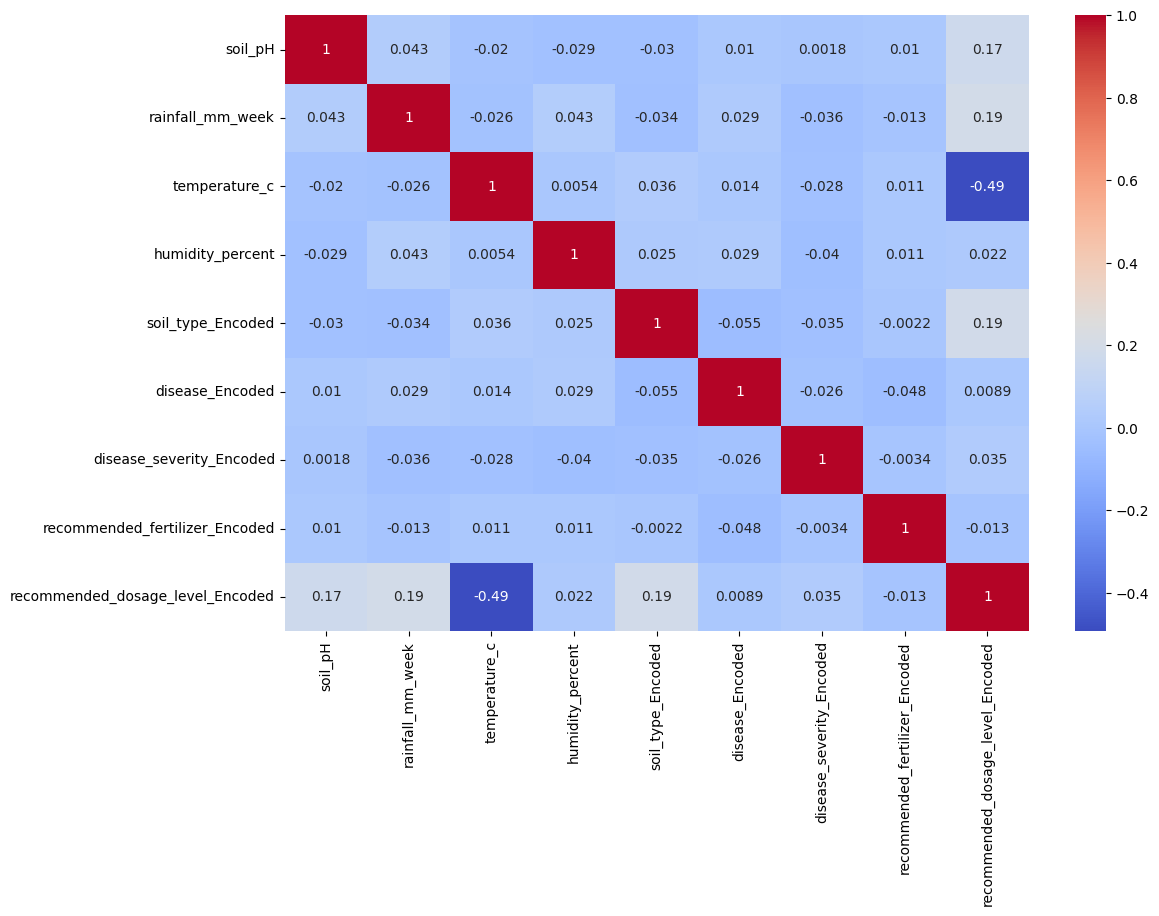

In [106]:
# 2. Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm")

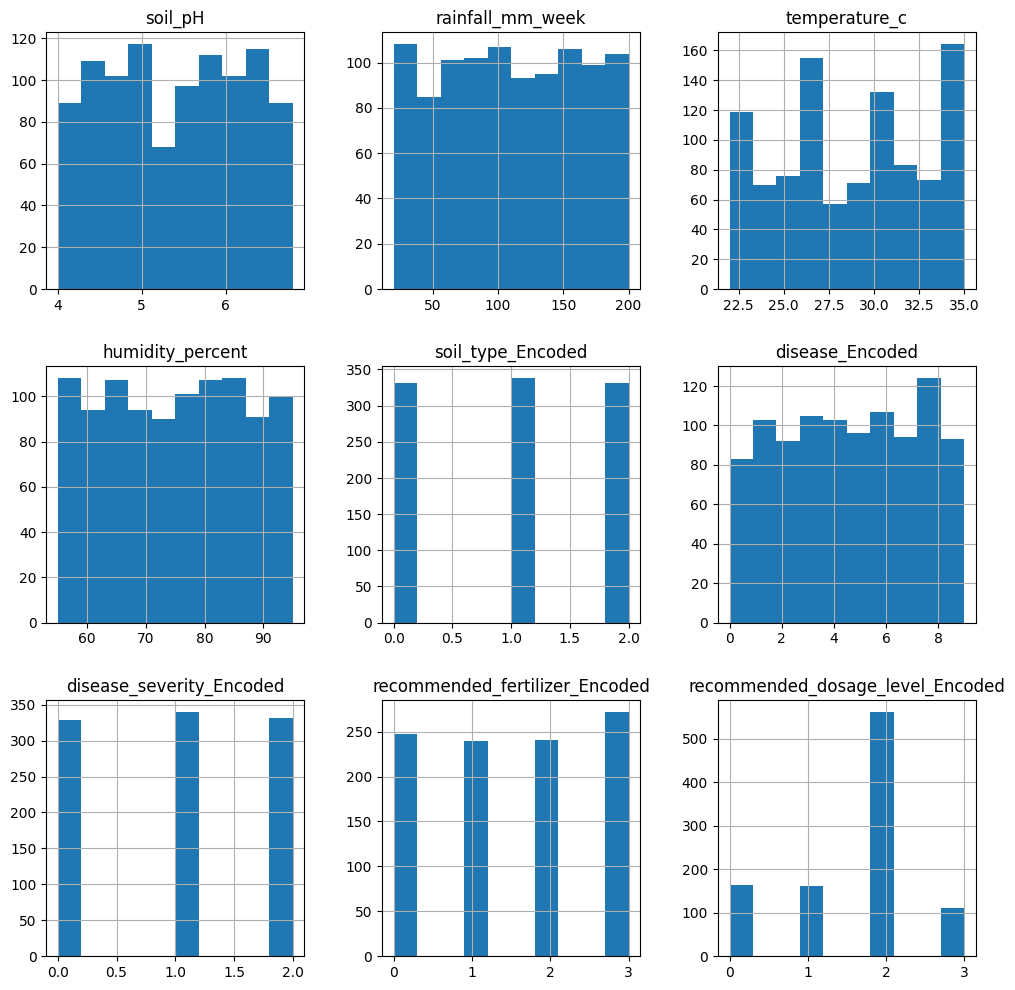

In [107]:
# 3. Distributions
df.hist(figsize=(12,12))
plt.show()


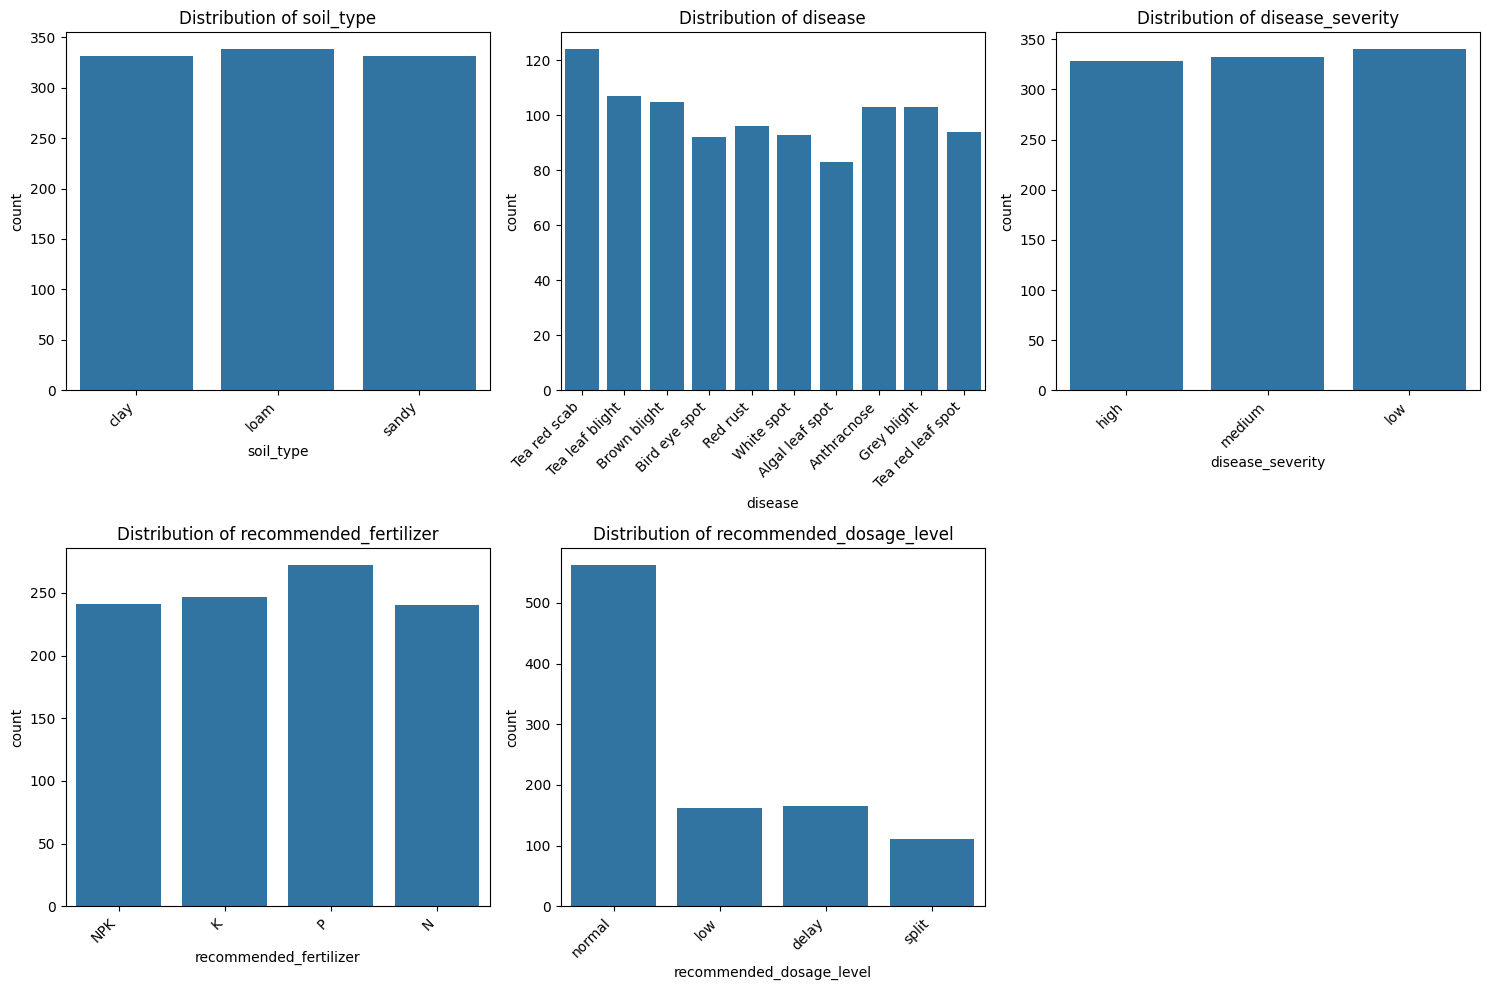

In [108]:
# Countplots for categorical columns
categorical_cols = ["soil_type", "disease", "disease_severity", "recommended_fertilizer", "recommended_dosage_level"]

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 3, i + 1) # Adjust subplot grid as needed
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

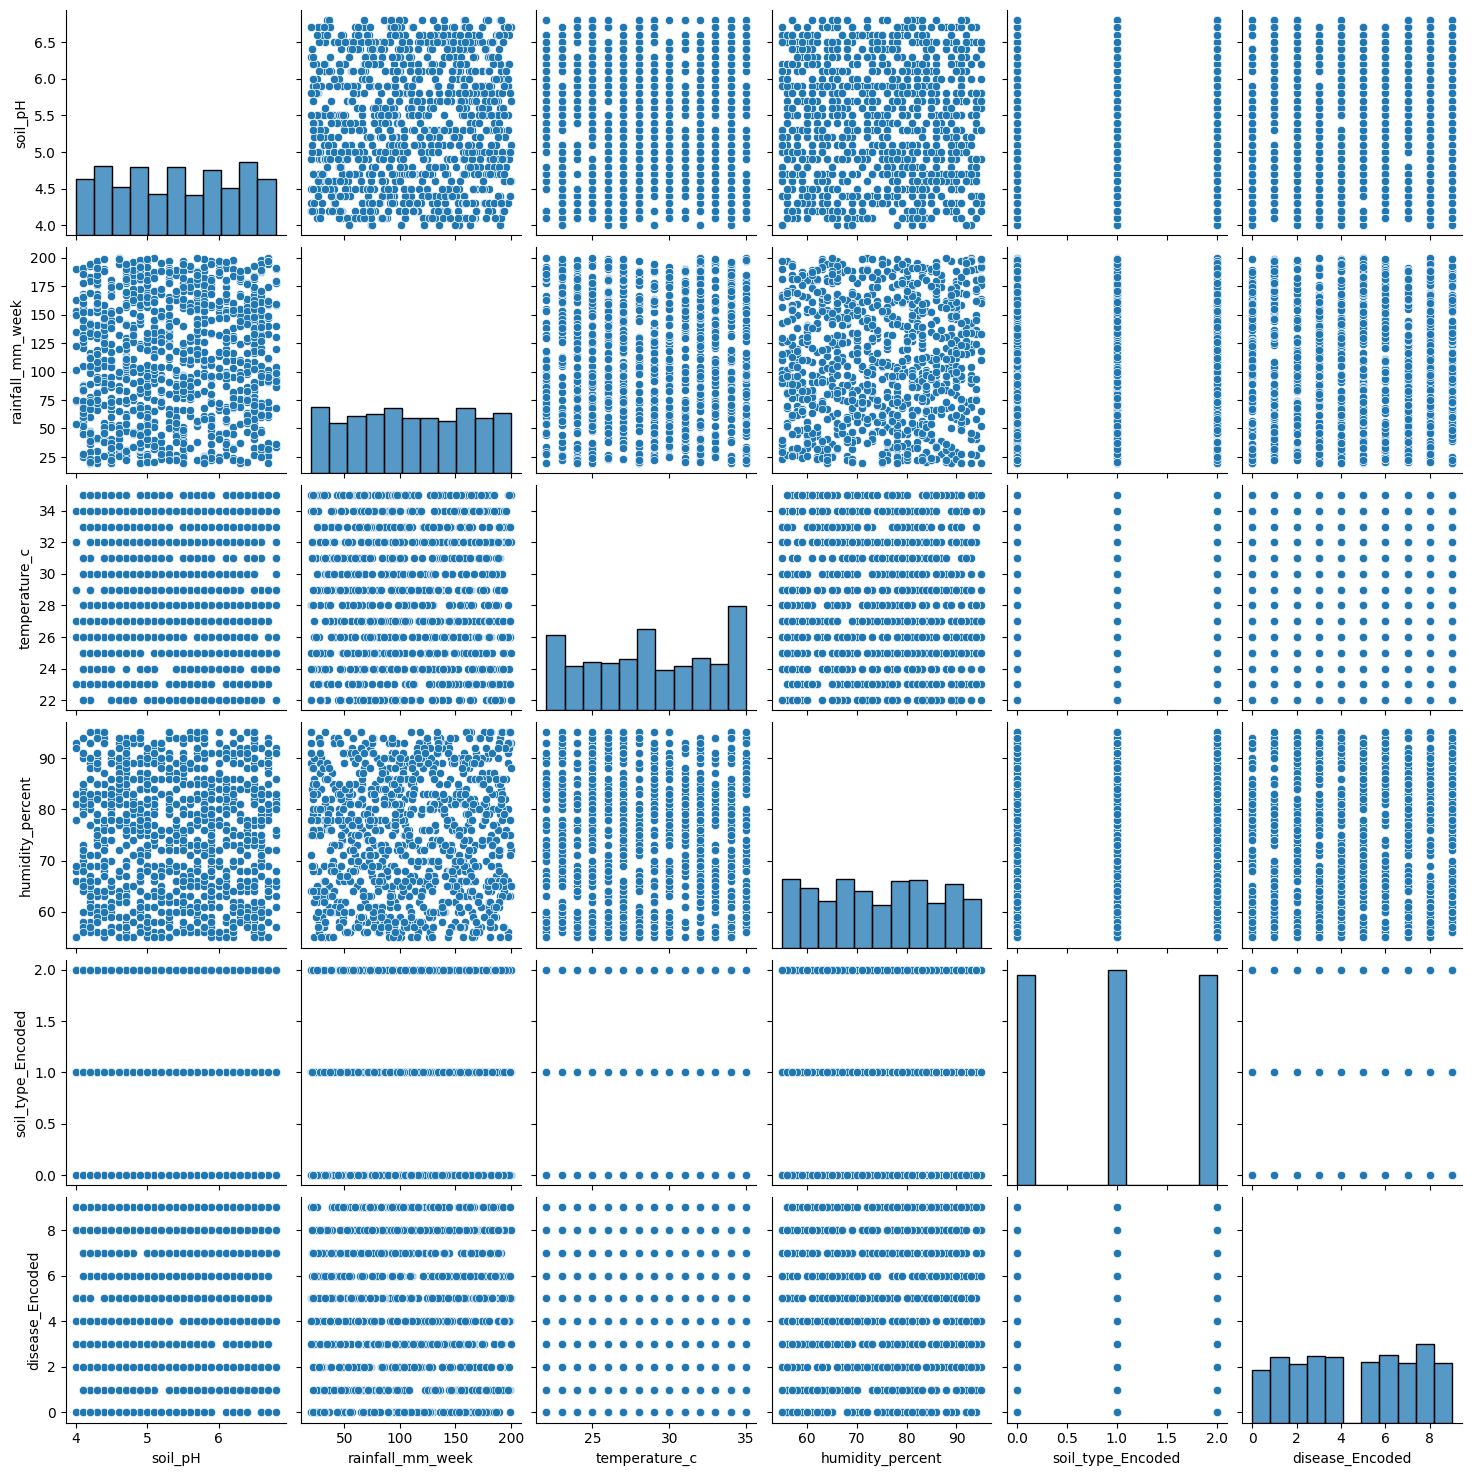

In [109]:

sns.pairplot(df[["soil_pH", "rainfall_mm_week", "temperature_c", "humidity_percent", "soil_type_Encoded", "disease_Encoded"]])
plt.show()

#Random Forest

In [110]:
le_fert = LabelEncoder()
le_dose = LabelEncoder()

y_train_enc = pd.DataFrame({
    "fertilizer": le_fert.fit_transform(y_train["recommended_fertilizer_Encoded"]),
    "dosage": le_dose.fit_transform(y_train["recommended_dosage_level_Encoded"])
})

y_test_enc = pd.DataFrame({
    "fertilizer": le_fert.transform(y_test["recommended_fertilizer_Encoded"]),
    "dosage": le_dose.transform(y_test["recommended_dosage_level_Encoded"])
})

In [111]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

cat_features = ["soil_type", "disease", "disease_severity"]
num_features = [
    "soil_pH",
    "rainfall_mm_week",
    "temperature_c",
    "humidity_percent"
]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features),
        ("num", StandardScaler(), num_features) # Apply StandardScaler to numerical features
    ]
)

In [112]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier

rf_model = MultiOutputClassifier(
    RandomForestClassifier(
        n_estimators=200,
        max_depth=12,
        min_samples_leaf=5,
        random_state=42
    )
)


In [113]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("prep", preprocessor),   # OneHotEncoder + numeric passthrough
    ("model", rf_model)
])


Hyperparameter tuning

In [114]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier

# Define the pipeline with preprocessor and MultiOutputClassifier
rf_pipeline = Pipeline([
    ('prep', preprocessor),  # Use the preprocessor defined earlier
    ('clf', MultiOutputClassifier(RandomForestClassifier(
        random_state=42,
        n_jobs=-1,
        class_weight='balanced'
        )))
])

# Define parameters for GridSearchCV. These parameters now refer to the RandomForestClassifier within the pipeline.
params = {
    "clf__estimator__n_estimators": [100, 200, 300],
    "clf__estimator__max_depth": [5, 10, 20, None],
    "clf__estimator__min_samples_split": [2, 5, 10]
}
def custom_accuracy(y_true, y_pred):
    # subset accuracy: BOTH outputs must be correct
    return np.mean(np.all(y_true == y_pred, axis=1))

# Initialize GridSearchCV with the pipeline and parameters, using our custom_accuracy scorer
grid = GridSearchCV(rf_pipeline, params, cv=3, n_jobs=-1, scoring=custom_accuracy) # Use the custom_accuracy scorer

# Fit GridSearchCV
grid.fit(X_train, y_train_enc) # Use y_train_enc as it's the processed target

print("Best Parameters:", grid.best_params_)
best_model = grid.best_estimator_

#OR
# grid = GridSearchCV(
#     pipeline,
#     param_grid=params,
#     cv=3,
#     scoring=custom_accuracy
# )

# grid.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best Parameters: {'clf__estimator__max_depth': 5, 'clf__estimator__min_samples_split': 2, 'clf__estimator__n_estimators': 100}


In [115]:
# Fit the pipeline before making predictions
rf_pipeline.fit(X_train, y_train_enc)


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['soil_type', 'disease',
                                                   'disease_severity']),
                                                 ('num', StandardScaler(),
                                                  ['soil_pH',
                                                   'rainfall_mm_week',
                                                   'temperature_c',
                                                   'humidity_percent'])])),
                ('clf',
                 MultiOutputClassifier(estimator=RandomForestClassifier(class_weight='balanced',
                                                                        n_jobs=-1,
                                                                        random_state=42)))])

In [116]:
#rf_pred = pipeline.predict(X_test)
rf_pred = best_model.predict(X_test)

Evaluating random forest

In [117]:
from sklearn.metrics import classification_report

print("FERTILIZER PREDICTION")
print(classification_report(y_test_enc["fertilizer"], rf_pred[:, 0]))

print("\nDOSAGE PREDICTION")
print(classification_report(y_test_enc["dosage"], rf_pred[:, 1]))

FERTILIZER PREDICTION
              precision    recall  f1-score   support

           0       0.23      0.23      0.23        44
           1       0.35      0.20      0.26        55
           2       0.26      0.24      0.25        54
           3       0.21      0.34      0.26        47

    accuracy                           0.25       200
   macro avg       0.26      0.25      0.25       200
weighted avg       0.27      0.25      0.25       200


DOSAGE PREDICTION
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00       110
           3       1.00      1.00      1.00        24

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



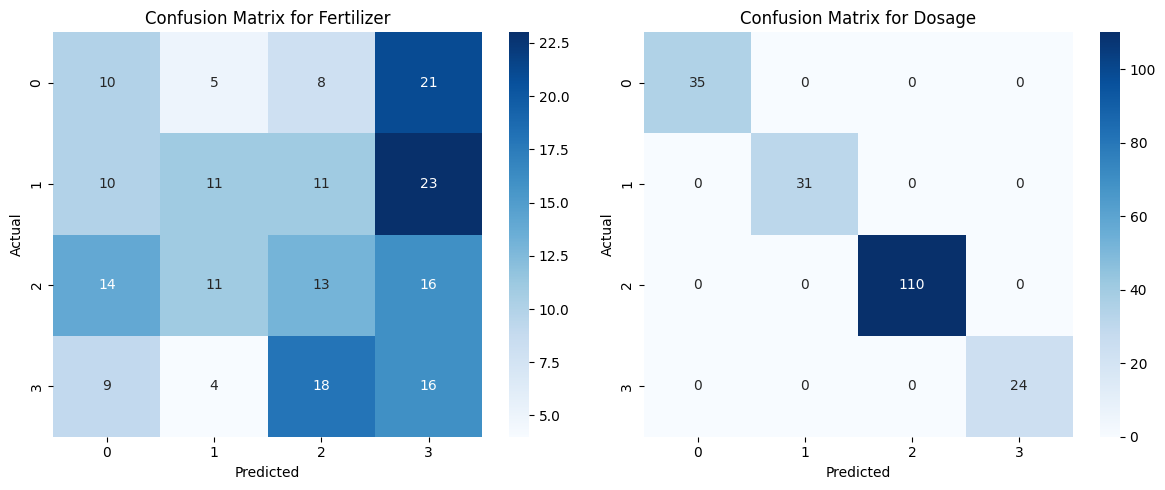

In [118]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get target names from y_test_enc (which has 'fertilizer' and 'dosage' columns)
target_names_eval = y_test_enc.columns.tolist()

plt.figure(figsize=(12, 5))

for i, target_name in enumerate(target_names_eval):
    plt.subplot(1, 2, i + 1) # Create subplots for each target
    cm = confusion_matrix(y_test_enc.iloc[:, i], rf_pred[:, i])
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix for {target_name.capitalize()}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()

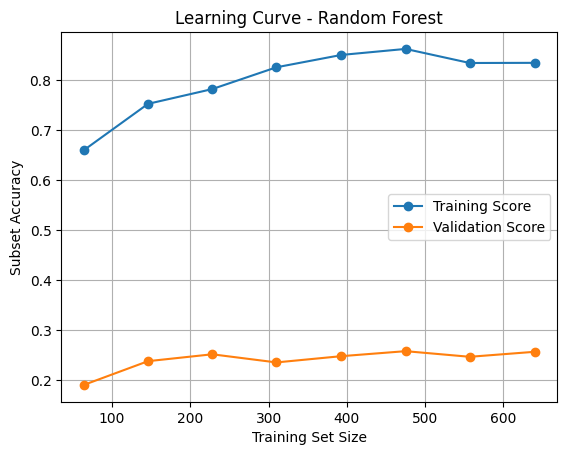

In [119]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer

def subset_accuracy(y_true, rf_pred):
    return np.mean(np.all(y_true ==rf_pred, axis=1))

custom_scorer = make_scorer(subset_accuracy)

train_sizes, train_scores, val_scores = learning_curve(
    pipeline,
    X_train,
    y_train_enc,
    cv=5,
    scoring=custom_scorer,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 8)
)

train_mean = np.nanmean(train_scores, axis=1)
val_mean = np.nanmean(val_scores, axis=1)

plt.plot(train_sizes, train_mean, 'o-', label="Training Score")
plt.plot(train_sizes, val_mean, 'o-', label="Validation Score")

plt.xlabel("Training Set Size")
plt.ylabel("Subset Accuracy")
plt.title("Learning Curve - Random Forest")
plt.legend()
plt.grid(True)
plt.show()

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, average_precision_score

def get_multioutput_proba(rf_pipeline, X):
    X_trans = rf_pipeline.named_steps["prep"].transform(X)
    estimators = rf_pipeline.named_steps["clf"].estimators_ # Corrected step name from 'rf_model' to 'clf'
    return [est.predict_proba(X_trans) for est in estimators]

def plot_prc_multiclass(y_true_int, proba, class_names, title):
    y_bin = label_binarize(y_true_int, classes=np.arange(len(class_names)))

    plt.figure(figsize=(8, 5))
    for i, cname in enumerate(class_names):
        precision, recall, _ = precision_recall_curve(y_bin[:, i], proba[:, i])
        ap = average_precision_score(y_bin[:, i], proba[:, i])
        plt.plot(recall, precision, label=f"{cname} (AP={ap:.2f})")

    macro_ap = average_precision_score(y_bin, proba, average="macro")
    plt.title(f"{title} | Macro-AP={macro_ap:.2f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.grid(True)
    plt.legend()
    plt.show()

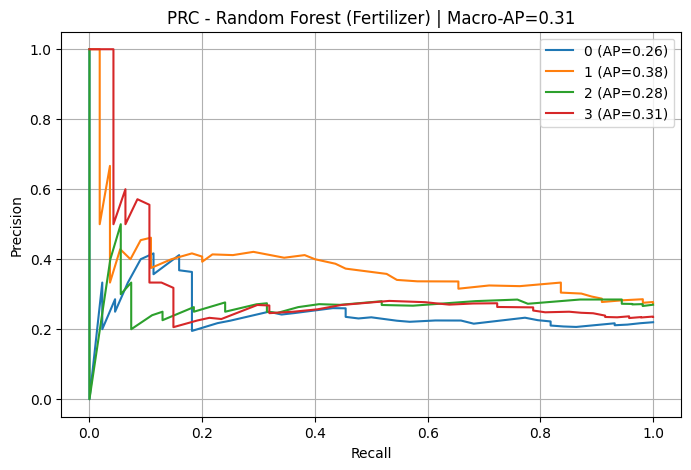

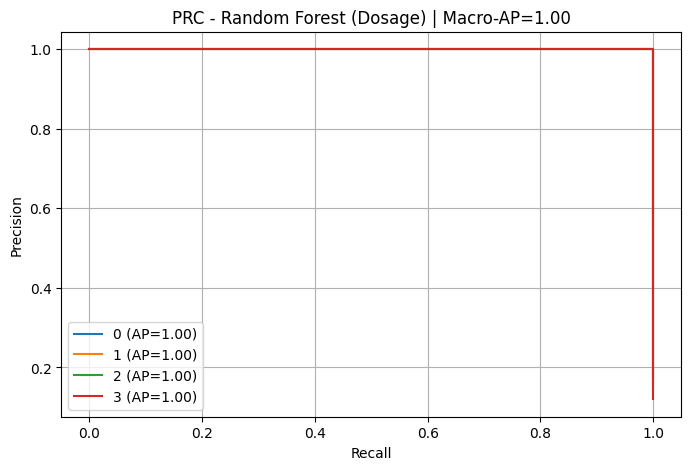

In [121]:
fert_classes = list(le_fert.classes_)
dose_classes = list(le_dose.classes_)

rf_probas = get_multioutput_proba(rf_pipeline, X_test)

# Fertilizer PRC
plot_prc_multiclass(
    y_true_int=y_test_enc["fertilizer"].values,
    proba=rf_probas[0],
    class_names=fert_classes,
    title="PRC - Random Forest (Fertilizer)"
)

# Dosage PRC model
plot_prc_multiclass(
    y_true_int=y_test_enc["dosage"].values,
    proba=rf_probas[1],
    class_names=dose_classes,
    title="PRC - Random Forest (Dosage)"
)


#Decision tree

In [122]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree

In [123]:
#TRAIN MODEL
dt_model = MultiOutputClassifier(
    DecisionTreeClassifier(
        max_depth=8,
        min_samples_leaf=5,
        random_state=42
    )
)

# Pipeline = preprocess + model
dt_pipeline = Pipeline([
    ("prep", preprocessor),
    ("model", dt_model)
])

dt_pipeline.fit(X_train, y_train)

dt_pred = dt_pipeline.predict(X_test)

In [124]:
print("FERTILIZER PREDICTION")
print(classification_report(y_test_enc["fertilizer"], dt_pred[:, 0]))

FERTILIZER PREDICTION
              precision    recall  f1-score   support

           0       0.20      0.18      0.19        44
           1       0.38      0.15      0.21        55
           2       0.27      0.30      0.28        54
           3       0.27      0.45      0.33        47

    accuracy                           0.27       200
   macro avg       0.28      0.27      0.25       200
weighted avg       0.28      0.27      0.25       200



In [125]:
print("\nDOSAGE PREDICTION")
print(classification_report(y_test_enc["dosage"], dt_pred[:, 1]))


DOSAGE PREDICTION
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00       110
           3       1.00      1.00      1.00        24

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



##Decision tree visualizations

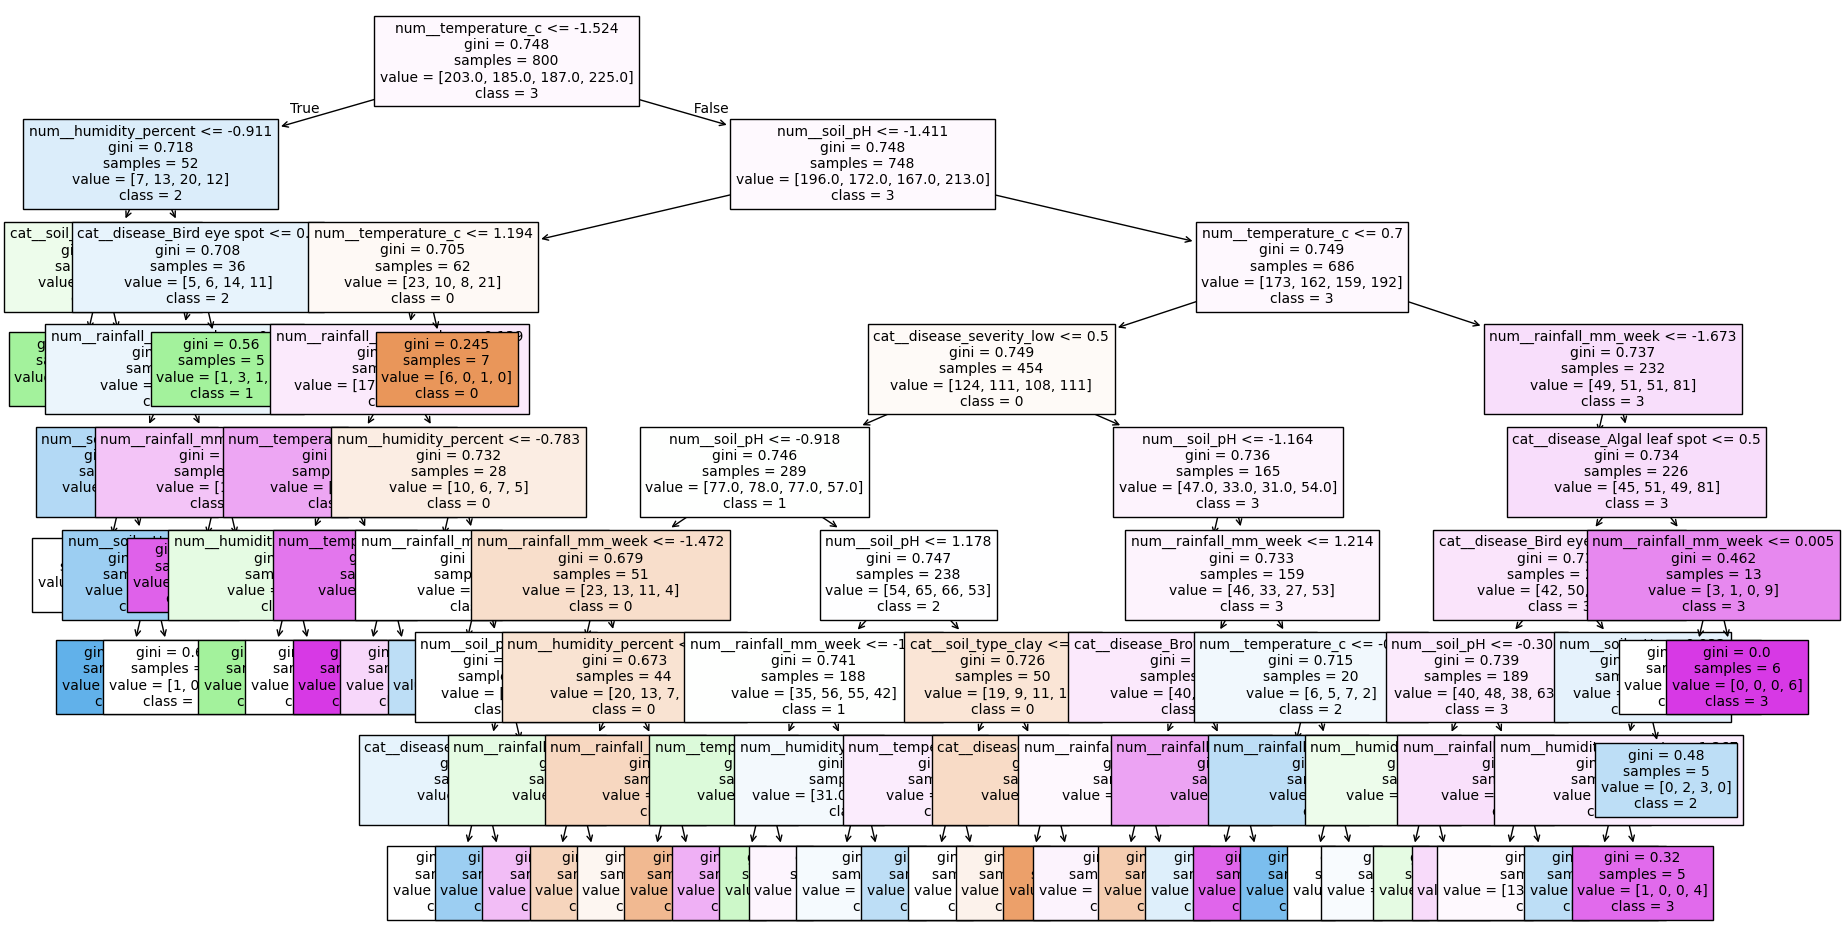

In [126]:
# --- VISUALIZE TREE ---
plt.figure(figsize=(22,12))

# Extract the first DecisionTreeClassifier from the MultiOutputClassifier in the pipeline
# pipeline['model'] accesses the MultiOutputClassifier
# .estimators_[0] accesses the first trained DecisionTreeClassifier (for the first output)
individual_dt_estimator = dt_pipeline['model'].estimators_[0]

# Get feature names after preprocessing
feature_names_out = dt_pipeline['prep'].get_feature_names_out()

# Get class names for the first output from the individual estimator
class_names_out = [str(c) for c in individual_dt_estimator.classes_] # Convert class names to string if they are numerical

tree.plot_tree(
    individual_dt_estimator,
    feature_names=feature_names_out,
    class_names=class_names_out,
    filled=True,
    fontsize=10
)
plt.show()

Confusion Matrices for Decision Tree Model:


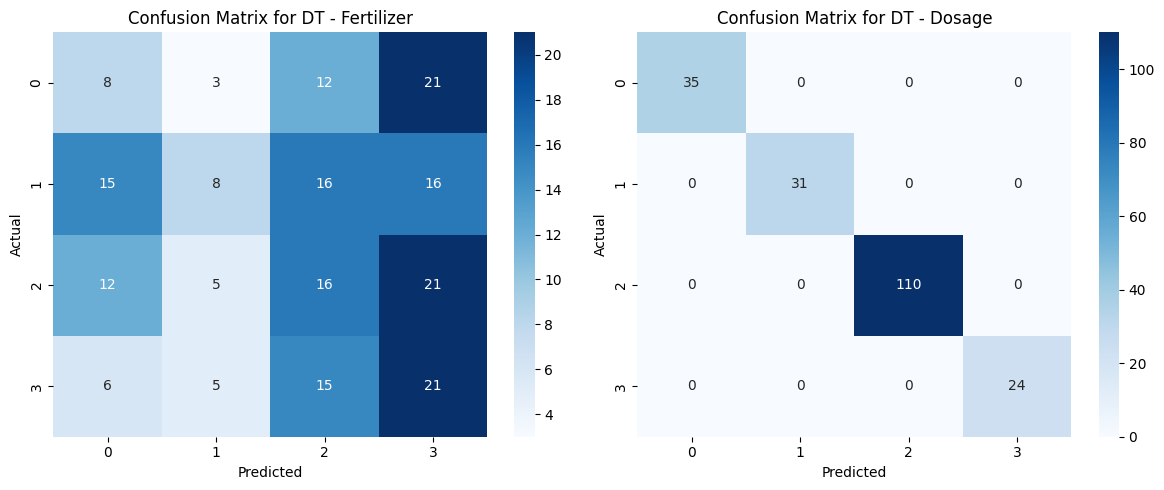

In [127]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get target names from y_test_enc (which has 'fertilizer' and 'dosage' columns)
target_names_eval = y_test_enc.columns.tolist()

plt.figure(figsize=(12, 5))

print("Confusion Matrices for Decision Tree Model:")
for i, target_name in enumerate(target_names_eval):
    plt.subplot(1, 2, i + 1) # Create subplots for each target
    # Using dt_pred for Decision Tree predictions
    cm = confusion_matrix(y_test_enc.iloc[:, i], dt_pred[:, i])
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix for DT - {target_name.capitalize()}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()

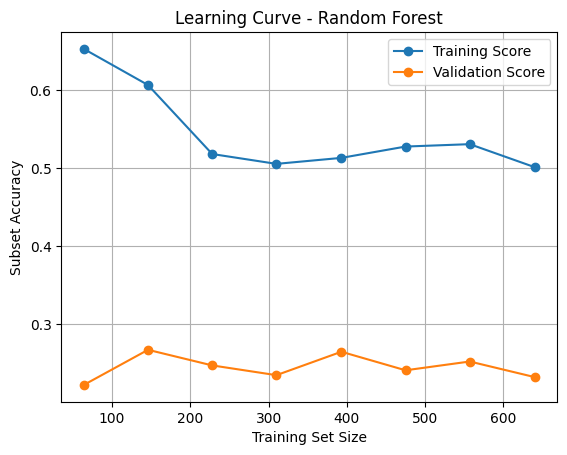

In [128]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer

def subset_accuracy(y_true, dt_pred):
    return np.mean(np.all(y_true == dt_pred, axis=1))

custom_scorer = make_scorer(subset_accuracy)

train_sizes, train_scores, val_scores = learning_curve(
    dt_pipeline,
    X_train,
    y_train_enc.values,                 # IMPORTANT: use .values (2D numeric)
    cv=5,
    scoring=custom_scorer,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 8),
    error_score="raise"                 # IMPORTANT: shows the real error instead of NaNs
)

train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.plot(train_sizes, train_mean, 'o-', label="Training Score")
plt.plot(train_sizes, val_mean, 'o-', label="Validation Score")

plt.xlabel("Training Set Size")
plt.ylabel("Subset Accuracy")
plt.title("Learning Curve - Random Forest")
plt.legend()
plt.grid(True)
plt.show()

In [129]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, average_precision_score

def get_multioutput_proba(dt_pipeline, X):
    X_trans = dt_pipeline.named_steps["prep"].transform(X)
    estimators = dt_pipeline.named_steps["model"].estimators_ # Corrected step name from 'clf' to 'model'
    return [est.predict_proba(X_trans) for est in estimators]

def plot_prc_multiclass(y_true_int, proba, class_names, title):
    y_bin = label_binarize(y_true_int, classes=np.arange(len(class_names)))

    plt.figure(figsize=(8, 5))
    for i, cname in enumerate(class_names):
        precision, recall, _ = precision_recall_curve(y_bin[:, i], proba[:, i])
        ap = average_precision_score(y_bin[:, i], proba[:, i])
        plt.plot(recall, precision, label=f"{cname} (AP={ap:.2f})")

    macro_ap = average_precision_score(y_bin, proba, average="macro")
    plt.title(f"{title} | Macro-AP={macro_ap:.2f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.grid(True)
    plt.legend()
    plt.show()

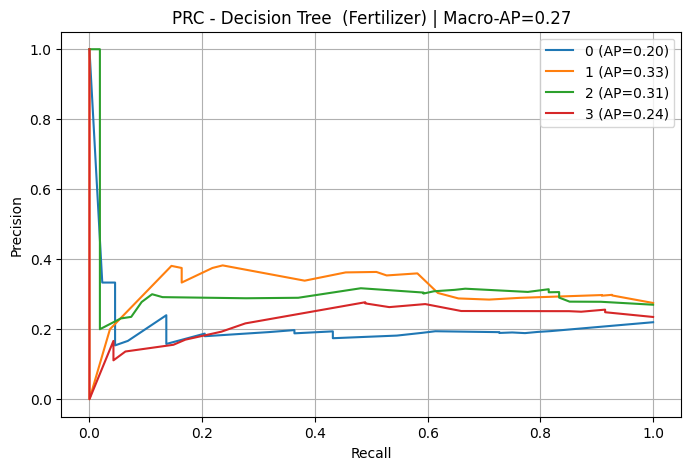

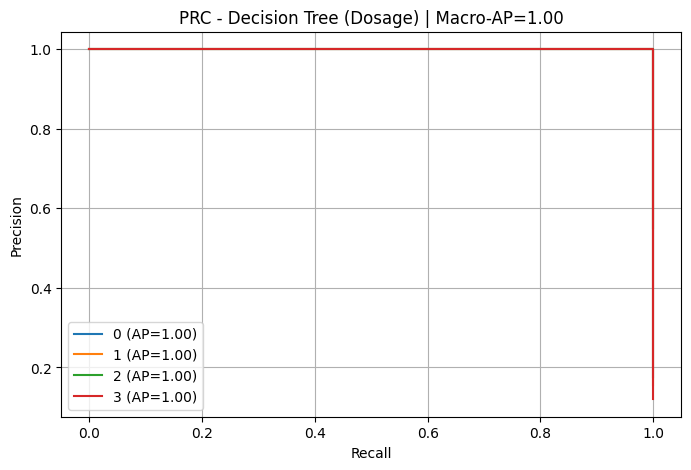

In [130]:
fert_classes = list(le_fert.classes_)
dose_classes = list(le_dose.classes_)

dt_probas = get_multioutput_proba(dt_pipeline, X_test)

# Fertilizer PRC
plot_prc_multiclass(
    y_true_int=y_test_enc["fertilizer"].values,
    proba=dt_probas[0],
    class_names=fert_classes,
    title="PRC - Decision Tree  (Fertilizer)"
)

# Dosage PRC model
plot_prc_multiclass(
    y_true_int=y_test_enc["dosage"].values,
    proba=dt_probas[1],
    class_names=dose_classes,
    title="PRC - Decision Tree (Dosage)"
)


#Gradient boosting

In [131]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = MultiOutputClassifier(
    GradientBoostingClassifier(
        n_estimators=100,
        learning_rate=0.01,
        max_depth=3,
        random_state=42
    )
)

In [132]:
gb_pipeline = Pipeline([
    ("prep", preprocessor),
    ("model", gb_model)
])

In [133]:
gb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['soil_type', 'disease',
                                                   'disease_severity']),
                                                 ('num', StandardScaler(),
                                                  ['soil_pH',
                                                   'rainfall_mm_week',
                                                   'temperature_c',
                                                   'humidity_percent'])])),
                ('model',
                 MultiOutputClassifier(estimator=GradientBoostingClassifier(learning_rate=0.01,
                                                                            random_state=42)))])

In [134]:
gb_pred = gb_pipeline.predict(X_test)

In [135]:
print("FERTILIZER PREDICTION")
print(classification_report(y_test_enc["fertilizer"], gb_pred[:, 0]))

FERTILIZER PREDICTION
              precision    recall  f1-score   support

           0       0.17      0.16      0.16        44
           1       0.27      0.13      0.17        55
           2       0.35      0.11      0.17        54
           3       0.26      0.64      0.37        47

    accuracy                           0.25       200
   macro avg       0.26      0.26      0.22       200
weighted avg       0.27      0.25      0.22       200



In [136]:
print("\nDOSAGE PREDICTION")
print(classification_report(y_test_enc["dosage"], gb_pred[:, 1]))


DOSAGE PREDICTION
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00       110
           3       1.00      1.00      1.00        24

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [137]:
def subset_accuracy(y_true, gb_pred):
    return np.mean(np.all(y_true == gb_pred, axis=1))

custom_scorer = make_scorer(subset_accuracy)

In [138]:

train_sizes, train_scores, val_scores = learning_curve(
    gb_pipeline,
    X_train,
    y_train_enc.values,                 # IMPORTANT (2D numeric)
    cv=3,                               # start with 3, can increase later
    scoring=custom_scorer,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 8),
    error_score="raise"                 # avoids silent NaNs
)

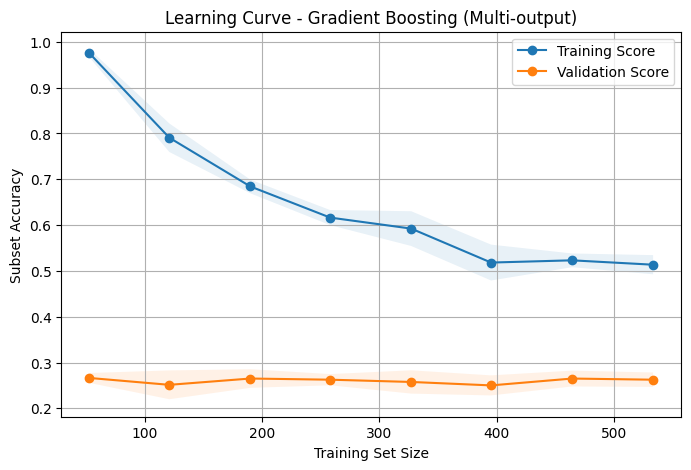

In [139]:
train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_mean, "o-", label="Training Score")
plt.plot(train_sizes, val_mean, "o-", label="Validation Score")

plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.1)
plt.fill_between(train_sizes, val_mean-val_std, val_mean+val_std, alpha=0.1)

plt.title("Learning Curve - Gradient Boosting (Multi-output)")
plt.xlabel("Training Set Size")
plt.ylabel("Subset Accuracy")
plt.grid(True)
plt.legend()
plt.show()

In [140]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, average_precision_score

def get_multioutput_proba(gb_pipeline, X):
    X_trans = gb_pipeline.named_steps["prep"].transform(X)
    estimators = gb_pipeline.named_steps["model"].estimators_ # Corrected step name from 'clf' to 'model'
    return [est.predict_proba(X_trans) for est in estimators]

def plot_prc_multiclass(y_true_int, proba, class_names, title):
    y_bin = label_binarize(y_true_int, classes=np.arange(len(class_names)))

    plt.figure(figsize=(8, 5))
    for i, cname in enumerate(class_names):
        precision, recall, _ = precision_recall_curve(y_bin[:, i], proba[:, i])
        ap = average_precision_score(y_bin[:, i], proba[:, i])
        plt.plot(recall, precision, label=f"{cname} (AP={ap:.2f})")

    macro_ap = average_precision_score(y_bin, proba, average="macro")
    plt.title(f"{title} | Macro-AP={macro_ap:.2f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.grid(True)
    plt.legend()
    plt.show()

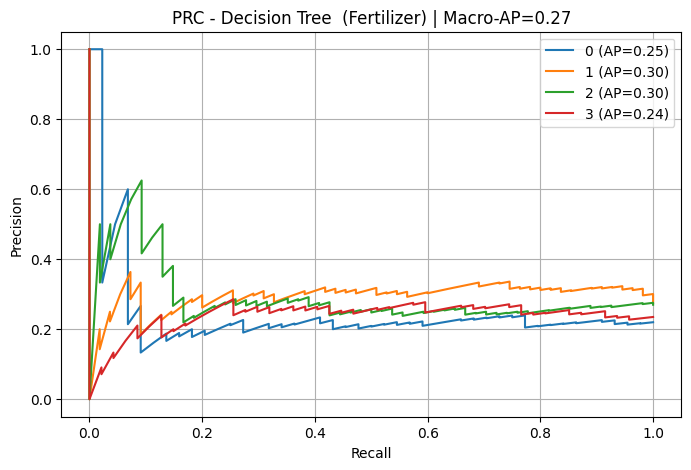

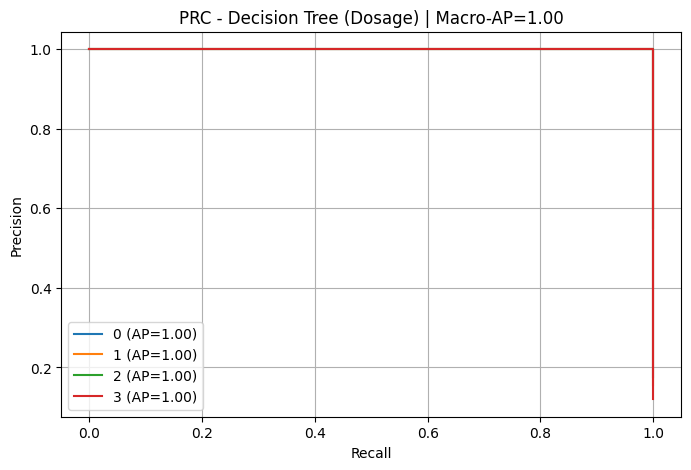

In [141]:
fert_classes = list(le_fert.classes_)
dose_classes = list(le_dose.classes_)

gb_probas = get_multioutput_proba(gb_pipeline, X_test)

# Fertilizer PRC
plot_prc_multiclass(
    y_true_int=y_test_enc["fertilizer"].values,
    proba=gb_probas[0],
    class_names=fert_classes,
    title="PRC - Decision Tree  (Fertilizer)"
)

# Dosage PRC model
plot_prc_multiclass(
    y_true_int=y_test_enc["dosage"].values,
    proba=gb_probas[1],
    class_names=dose_classes,
    title="PRC - Decision Tree (Dosage)"
)


In [142]:
df["recommended_dosage_level"].value_counts(normalize=True)


,proportion
recommended_dosage_level,
normal,0.562
delay,0.165
low,0.162
split,0.111


In [143]:
df["recommended_fertilizer"].value_counts(normalize=True)


,proportion
recommended_fertilizer,
P,0.272
K,0.247
NPK,0.241
N,0.240
